In [1]:
import os
import glob
import itertools
import json
import matplotlib as mpl
import scipy.stats as spstats
import dill as pkl
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl

In [2]:
import importlib

In [3]:
import analyze2p.extraction.traces as traceutils

In [4]:
va='V1'
dk='20190522_JC084_fov1'

# Test offset

In [5]:
soma_fpath = traceutils.get_data_fpath(dk, experiment_name='gratings',
                                       trace_type='np_subtracted')
dset = np.load(soma_fpath, allow_pickle=True)
xdata_df = pd.DataFrame(dset['data'][:])
# F0 = pd.DataFrame(dset['f0'][:]).mean().mean()
F0 = list(np.nanmean(dset['f0'][:], axis=0))


In [6]:
neuropil_fpath = soma_fpath.replace('np_subtracted', 'neuropil')
npdata = np.load(neuropil_fpath, allow_pickle=True)
neuropil_f0 = np.nanmean(np.nanmean(pd.DataFrame(npdata['f0'][:])))
neuropil_df = pd.DataFrame(npdata['data'][:])
add_np_offsets = list(np.nanmean(neuropil_df, axis=0))


In [ ]:
raw_fpath = soma_fpath.replace('np_subtracted', 'raw')
rawdata = np.load(raw_fpath, allow_pickle=True)
raw_f0 = np.nanmean(np.nanmean(pd.DataFrame(rawdata['f0'][:])))
raw_df = pd.DataFrame(rawdata['data'][:])
add_raw_offsets = list(np.nanmean(raw_df, axis=0))


In [ ]:
add_raw_each = xdata_df + raw_f0 #+ neuropil_f0 #raw_f0
add_f0_each = xdata_df + F0# + #raw_f0 #raw_f0
# currway = xdata_df + add_np_offsets + neuropil_f0 + raw_f0
add_f0 = xdata_df + np.mean(F0)

In [ ]:
fig, ax = pl.subplots()
ax.plot(xdata_df[rid][0:2000], label='raw')
ax.plot(add_raw_each[rid][0:2000], label='add raw offsets')
ax.plot(add_f0_each[rid][0:2000], label='add f0 each')
ax.plot(add_f0[rid][0:2000], label='add f0')

# ax.plot(currway[rid][0:2000], label='add np + rawf0')
ax.legend(bbox_to_anchor=(1,1), loc='upper left', frameon=False)
pl.subplots_adjust(right=0.8)

In [ ]:
# Stimulus / condition info
labels = pd.DataFrame(data=dset['labels_data'], 
                      columns=dset['labels_columns'])
try: 
    labels = hutils.convert_columns_byte_to_str(labels)
except (UnicodeDecodeError, AttributeError):
    pass

In [ ]:
# Process dff/df/etc.
stim_on_frame = labels['stim_on_frame'].unique()[0]
tmp_df = []
tmp_dff = []
for k, g in labels.groupby(['trial']):
    tmat = currway.loc[g.index]
    bas_mean = np.nanmean(tmat[0:stim_on_frame], axis=0)
    #if trace_type == 'dff':
    tmat_dff = (tmat - bas_mean) / bas_mean
    tmp_dff.append(tmat_dff)
    #elif trace_type == 'df':
    tmat_df = (tmat - bas_mean)
    tmp_df.append(tmat_df)
dff_traces = pd.concat(tmp_dff, axis=0) 

In [ ]:
# Process dff/df/etc.
stim_on_frame = labels['stim_on_frame'].unique()[0]
tmp_df = []
tmp_dff = []
for k, g in labels.groupby(['trial']):
    tmat = add_raw.loc[g.index]
    bas_mean = np.nanmean(tmat[0:stim_on_frame], axis=0)
    #if trace_type == 'dff':
    tmat_dff = (tmat - bas_mean) / bas_mean
    tmp_dff.append(tmat_dff)
    #elif trace_type == 'df':
    tmat_df = (tmat - bas_mean)
    tmp_df.append(tmat_df)
dff_addraw = pd.concat(tmp_dff, axis=0)

In [ ]:
fig, ax = pl.subplots()
#ax.plot(dff_traces[rid][0:2000], lw=0.5)
ax.plot(dff_addraw[25][0:2000], lw=0.5)
# ax.plot(dff_x0[rid][0:2000], lw=0.5)

## Test whole process

In [9]:
import analyze2p.aggregate_datasets as aggr

/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.10, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [7]:
soma_fpath = traceutils.get_data_fpath(dk, experiment_name='gratings',
                                       trace_type='np_subtracted')
raw_traces, labels, sdf, _ = traceutils.load_dataset(soma_fpath, 
                                    trace_type='corrected', add_offset=True, 
                                    create_new=True, save=False)

... processing data arrays, no save (corrected).
    adding raw offset (raw f0 offset: 546.51)
    adding raw offset (raw f0 offset: 97.80)


In [10]:
dff_traces, metrics = aggr.process_traces(raw_traces, labels, trace_type='dff',
                                        response_type='dff', 
                                        trial_epoch='stimulus')

--- processed traces: dff


<IPython.core.display.Javascript object>


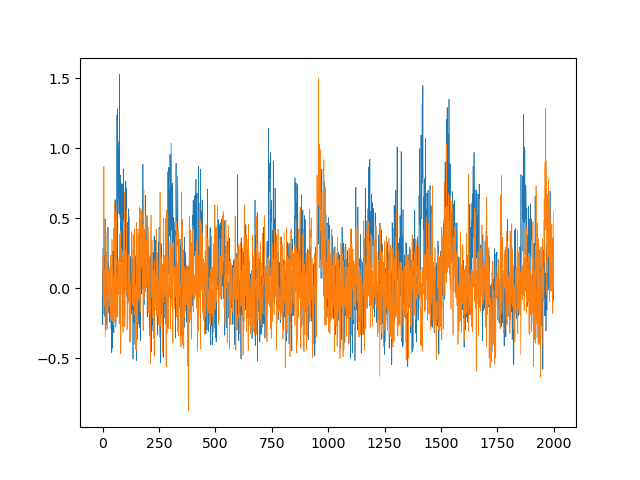

In [12]:
%matplotlib notebook
fig, ax = pl.subplots()
ax.plot(dff_traces[25][0:2000], lw=0.5)
ax.plot(dff_traces[30][0:2000], lw=0.5)

In [16]:
import analyze2p.objects.selectivity as sel

In [17]:
metrics['visual_area'] = va
metrics['datakey'] = dk
metrics.loc[metrics.index, 'trial'] = metrics.index.tolist()

ndf = pd.melt(metrics, id_vars=['visual_area', 'datakey', 'config', 'trial'], var_name='cell', 
              value_name='response')
ndf.head()

,visual_area,datakey,config,trial,cell,response
0,V1,20190522_JC084_fov1,config022,0,0,-0.143678
1,V1,20190522_JC084_fov1,config038,1,0,-0.001249
2,V1,20190522_JC084_fov1,config014,2,0,-0.057213
3,V1,20190522_JC084_fov1,config046,3,0,-0.020285
4,V1,20190522_JC084_fov1,config002,4,0,-0.102953


In [18]:
rdf0 = ndf.groupby(['visual_area', 'datakey', 'cell', 'config']).mean().reset_index()
print(rdf0['response'].min(), rdf0['response'].max())
rdf = sel.correct_offset(rdf0, offset='minsub')
print(rdf['response'].min(), rdf['response'].max())

-0.16090451086247526 0.5947540775054295
0.0 0.6182393644912827


#### check psth

In [19]:
import analyze2p.gratings.bootstrap_osi as osi

In [20]:
cfgs_ = sdf[(sdf['size']==20) & (sdf['speed']==10) & (sdf['sf']==0.1)].index.tolist()

<IPython.core.display.Javascript object>


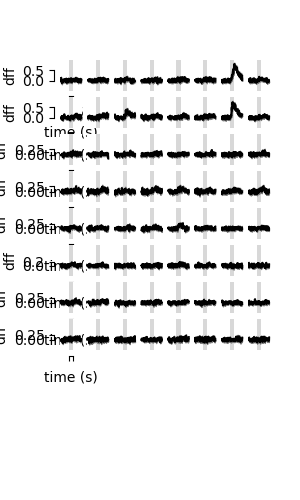

In [21]:
%matplotlib notebook
nonori_params=['sf', 'size', 'speed']

fig = pl.figure(figsize=(3,5))
n_rows = sdf[nonori_params].drop_duplicates().shape[0]
for si,( (sf, sz, sp), g) in enumerate(sdf.groupby(['sf', 'size', 'speed'])):
    cfgs_ = g.index.tolist()
    osi.plot_psth_roi(30, dff_traces, labels, cfgs_, sdf,  
                  trace_type='dff', fig=fig,
                  nr=n_rows, nc=8, s_row=si)
    if si!=0:
        ax.set_xticklabels([])
for ai, ax in enumerate(fig.axes):
    ax.set_ylim([-0.5, 1])
    if ai!=0:
        ax.set_xticklabels([])
pl.subplots_adjust(bottom=0.3, right=0.9, left=0.2)

# Test metrics

In [22]:
import analyze2p.objects.selectivity as sel

In [25]:
experiment='gratings'
trial_epoch = 'stimulus'
responsive_test='ROC'
# ---------------------------------------
responsive_thr=0.05 if responsive_test=='ROC' else 10.
response_type='dff'
traceid = 'traces001'
visual_areas=['V1', 'Lm', 'Li']
sdata, cells0 = aggr.get_aggregate_info(visual_areas=visual_areas, return_cells=True)
meta = sdata[sdata.experiment.isin(['gratings'])].copy()
all_dkeys = [(va, dk) for (va, dk), g in meta.groupby(['visual_area', 'datakey'])]
CELLS = pd.concat([g for (va, dk), g in cells0.groupby(['visual_area', 'datakey'])\
                                  if (va, dk) in all_dkeys])
CELLS[['visual_area', 'animalid', 'session', 'fovnum']]\
            .drop_duplicates().groupby(['visual_area']).count()

/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 13 dsets


,animalid,session,fovnum
visual_area,,,
Li,16,16,16
Lm,10,10,10
V1,9,9,9


In [26]:

assigned_cells, meta = aggr.select_assigned_cells(cells0, sdata, 
                                        experiments=[experiment])
NDATA0 = aggr.load_responsive_neuraldata(experiment, traceid=traceid,
                                       response_type=response_type,
                                       trial_epoch=trial_epoch,
                                       responsive_test=responsive_test,
                                       responsive_thr=responsive_thr)

/n/coxfs01/julianarhee/aggregate-visual-areas/dataset_info_assigned.pkl
Segmentation: missing 13 dsets
...loading: aggr_gratings_trialmeans_traces001_ROC-thr-0.05_dff_stimulus.pkl
Checking gratings configs


In [28]:
x0 = NDATA0[(NDATA0.visual_area==va) & (NDATA0.datakey==dk)].copy()
rdf0 = x0.groupby(['visual_area', 'datakey', 'cell', 'config']).mean().reset_index()

rdf = sel.correct_offset(rdf0, offset='minsub')
ixs_ = rdf.groupby(['cell']).apply(sel.assign_sparseness).rename(columns={0:'sparseness'})


In [29]:
roi_sparse = 30
roi_broad = 25

<IPython.core.display.Javascript object>


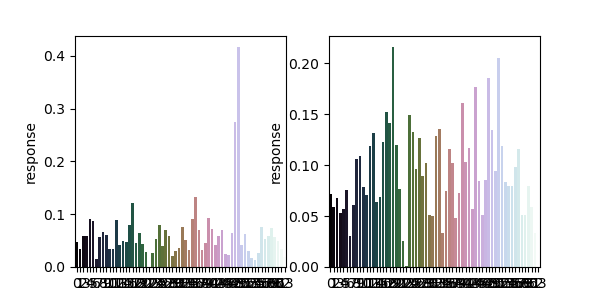

<AxesSubplot:ylabel='response'>

In [30]:

fig, axn =pl.subplots(1, 2, figsize=(6,3))
ax=axn[0]
sns.barplot(x=np.arange(0, 64), y=rdf[rdf['cell']==roi_sparse]['response'],
           palette='cubehelix', ax=ax)
ax=axn[1]
sns.barplot(x=np.arange(0, 64), y=rdf[rdf['cell']==roi_broad]['response'],
           palette='cubehelix', ax=ax)

In [31]:
n=10
responses = [0.1]*5
responses[2] = 0.6
# responses[-2] = 0.6
sel.sparseness(np.array(responses))

0.6250000000000001